<a href="https://colab.research.google.com/github/Manuel-FA/Deep_Learning/blob/main/Car_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#000080B">**ABSTRACT**</font>

# <font color="#000080B">**1. Introduction**</font>
---


## <font color="#000080B">**1.1. Content**</font>


## <font color="#000080B">**1.2. Problem statement**</font>

# <font color="#000080B">**2. Project preparation**</font>

---


## <font color="#000080B">**2.1. Libraries import**</font>

**Se importan librerías**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import random
import warnings
warnings.filterwarnings("ignore")

## <font color="#000080B">**2.2. Data import**</font>

**Carga de archivos**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
training_path = "/content/drive/MyDrive/Datasets/training_images"
testing_path = "/content/drive/MyDrive/Datasets/testing_images"
train_boxes_path = "/content/drive/MyDrive/Datasets/train_solution_bounding_boxes.csv"

In [4]:
#Se calcula la longitud del en listado de la carpeta especificada
print('Image(Train):',len(os.listdir("/content/drive/MyDrive/Datasets/training_images")))
print('Image(Test):',len(os.listdir("/content/drive/MyDrive/Datasets/testing_images")))

Image(Train): 1001
Image(Test): 175


# <font color="#000080B">**3. Exploratory data analysis**</font>
---

Hay un archivo extra el caul contiene el nombre de la imagen junto con las coordenadas de los 4 puntos del rectángulo de seleción

In [5]:
Data = pd.read_csv(train_boxes_path)

In [6]:
Data.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


In [7]:
print('Train data localization:',len(Data))

Train data localization: 559


Se visualiza una imagen con las coordenadas de lo que se encuentra en el CSV. Esto se va a eliminar

**Visuliazación de imágenes**

Photo shape: (380, 676, 3)
Name,xmin,ymin,xmax,ymax: ['vid_4_1000.jpg' 281.2590449 187.0350708 327.7279305 223.225547]


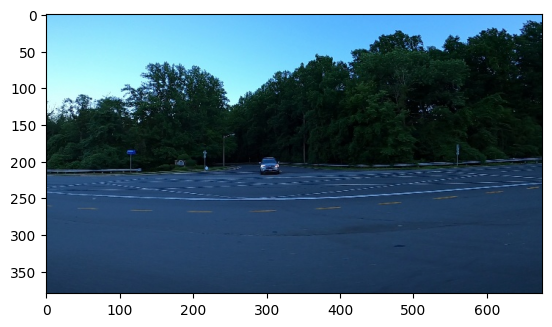

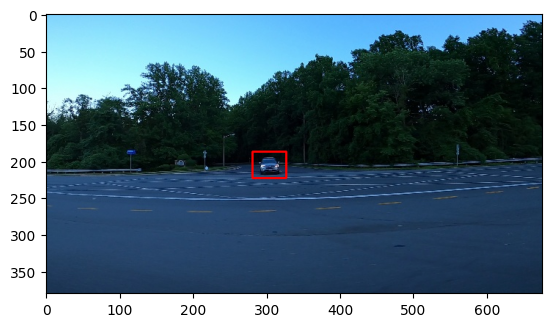

In [8]:
for i in Data.values:
  #Se lee el primer elemento de la data
  photo = plt.imread(f'/content/drive/MyDrive/Datasets/training_images/{i[0]}')
  plt.imshow(photo)
  #impresión de los 4 las aristas de la caja delimitadora
  print('Photo shape:',photo.shape)
  print('Name,xmin,ymin,xmax,ymax:',i)
  pt1=(int(i[1]),int(i[2]))
  pt2=(int(i[3]),int(i[4]))
  color=(255, 0, 0)
  thickness = 2
  # se agrega a la imagen su respectiva caja delimitadora
  cv2.rectangle(photo,pt1,pt2, color, thickness)
  plt.figure()
  plt.imshow(photo)
  break

Este hace lo mismo pero con 3 elementos

(380, 676, 3)
(380, 676, 3)
(380, 676, 3)


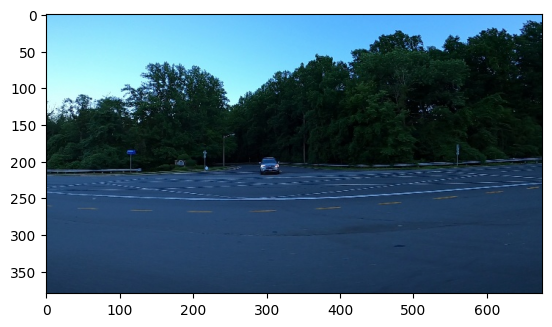

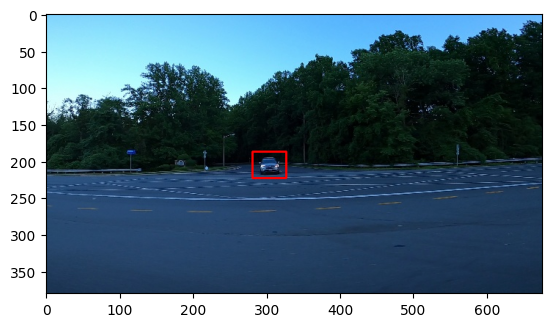

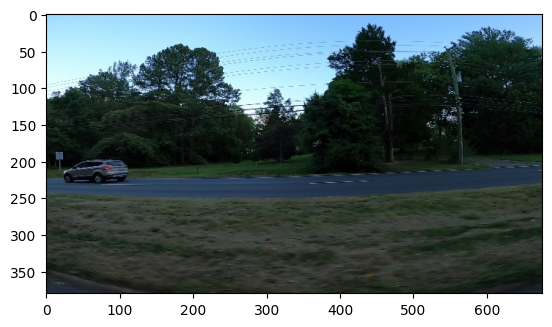

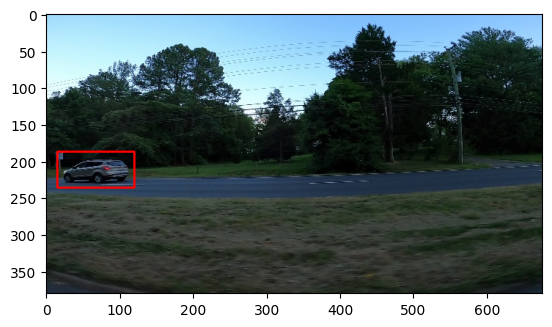

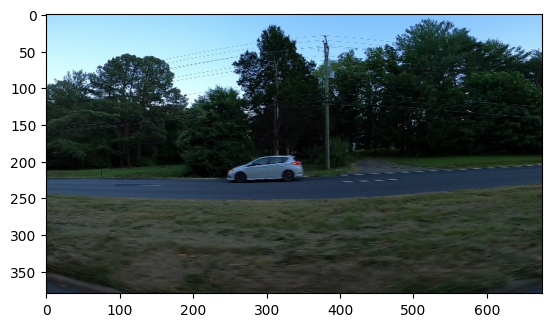

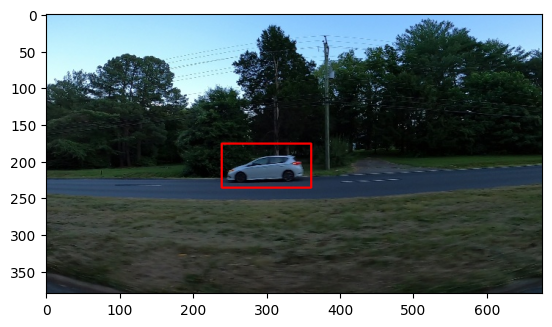

In [9]:
for a,i in enumerate(Data.values):
  #carga de imágnes en forma de matrices
  img=plt.imread('/content/drive/MyDrive/Datasets/training_images/'+i[0])
  print(img.shape)
  plt.figure()
  plt.imshow(img)
  xmin=int(i[1])
  ymin=int(i[2])
  xmax=int(i[3])
  ymax=int(i[4])
  #crea una caja delimitadora con las coordenadas indicadas
  cv2.rectangle(img,(xmin, ymin),(xmax, ymax),(255, 0, 0),2)
  plt.figure()
  plt.imshow(img)
  if a ==2:
    break

# <font color="#000080B">**4. Data preprocessing**</font>
---


on el módulo ximgproc para realizar una segmentación de imágenes utilizando el algoritmo "Selective Search". Este algoritmo es una técnica popular para proponer regiones de interés (RoIs) en imágenes para aplicaciones de detección de objetos.

In [10]:
cv2.setUseOptimized(True) # Optimeze
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation() # Selective search obje

 este código utiliza Selective Search para proponer regiones de interés en una imagen y luego muestra la imagen original con rectángulos verdes alrededor de cada región propuesta, SOLO PARA UNA IMAGEN, TENGO LA DUDA SI ESTO SIRVE PARA  ALGO EN ESPECIAL

Shape: (224, 224, 3)
possible bounty boxes: 213


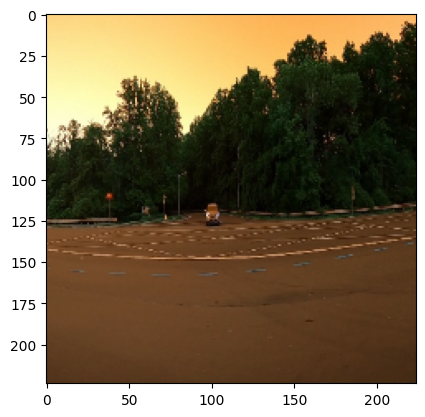

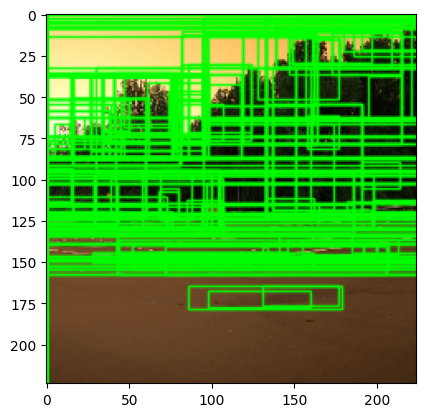

In [11]:
# se selecciona una imagen en particular
im = cv2.imread('/content/drive/MyDrive/Datasets/training_images/vid_4_1000.jpg')
# se redimenciona la imagen debido a los estándares del mdelo de ml
im=cv2.resize(im,(224,224))
plt.figure()
plt.imshow(im)
# se selecciona la imagen a aplicar el algoritmo
ss.setBaseImage(im) # GÖrüntünün yüklendiği kısım
ss.switchToSelectiveSearchFast() # Selective Search süresini hızlandırmak için
rects = ss.process()
print('Shape:',im.shape)
print('possible bounty boxes:',len(rects))

for rect in rects:
  x, y, w, h = rect
  imOut=cv2.rectangle(im, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imOut);

 El Índice de Superposición de la Unión (IoU), también conocido como Jaccard Index, es una métrica ampliamente utilizada en tareas de detección de objetos y segmentación semántica para evaluar la calidad de las regiones propuestas o la precisión de las cajas delimitadoras. El IoU mide la superposición entre dos áreas, normalizando la cantidad de área superpuesta en relación con el área total combinada de las dos regiones.
 Donde:

 IoU = Area de Intersección / Area de Unión

Área de Intersección: Es el área común entre las dos regiones o cajas delimitadoras.

Área de Unión: Es el área total cubierta por ambas regiones, incluyendo tanto el área superpuesta como las áreas no superpuestas.

El IoU varía entre 0 y 1, donde:

IoU = 0: Indica que las regiones no se superponen en absoluto.
IoU = 1: Indica que las regiones son idénticas o totalmente superpuestas.

In [12]:
#Iou and selective search
#se vuelven a fijar el algoritmo y la optimización
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
# función para calcular el iou entre dos cajas limitadoras
def get_iou(bb1, bb2):
#se detrmina si están en el prden correcto
    assert bb1['x1'] < bb1['x2'] #bb1
    assert bb1['y1'] < bb1['y2']

    assert bb2['x1'] < bb2['x2'] #bb2
    assert bb2['y1'] < bb2['y2'];
#se calculan las coordenadas con los maximos de y mínimos
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
      return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    #cáculo final
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [13]:
image_liste=[]
k=0
l=0
z=0 #Loading
for a in pd.read_csv(train_boxes_path).values:
  Name,xmin,ymin,xmax,ymax=a
  bb1={ #gerçek bounty boxxes
            'x1':int(xmin),
            'y1':int(ymin),
            'x2':int(xmax),
            'y2':int(ymax)
            }
  try:
    img=cv2.imread('/content/drive/MyDrive/Datasets/training_images/'+Name)
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    rects = ss.process()
    for i in rects:
      x, y, w, h = i # Selective bounty boxxes
      bb2={'x1':x,
          'y1':y,
          'x2':x+w,
          'y2':y+h
          }
      img1=img[bb2['y1']:bb2['y2'],bb2['x1']:bb2['x2']] # Crop img
      img1_shape=cv2.resize(img1,(224,224))
      if k<l:
            if 0.5<get_iou(bb1,bb2):
              image_liste.append([img1_shape,1])
              k+=1
      else:
        if 0.5<get_iou(bb1,bb2):
          image_liste.append([img1_shape,1])
          k+=1
        else:
          image_liste.append([img1_shape,0])
          l+=1
  except Exception as e:
    print('hata var',e)
  z+=1
  print(Name,z,len(rects))

vid_4_1000.jpg 1 1101
vid_4_10000.jpg 2 1456
vid_4_10040.jpg 3 1403
vid_4_10020.jpg 4 1489
vid_4_10060.jpg 5 1315
vid_4_10100.jpg 6 1537
vid_4_10120.jpg 7 1430
vid_4_10140.jpg 8 1544
vid_4_1020.jpg 9 1117
vid_4_1040.jpg 10 1146
vid_4_10480.jpg 11 1663
vid_4_10500.jpg 12 1815
vid_4_10520.jpg 13 1725
vid_4_1060.jpg 14 1251
vid_4_10960.jpg 15 1894
vid_4_10980.jpg 16 1676
vid_4_11000.jpg 17 1754
vid_4_11020.jpg 18 1553
vid_4_11240.jpg 19 1779
vid_4_11260.jpg 20 1863
vid_4_11280.jpg 21 1846
vid_4_11380.jpg 22 1884
vid_4_11400.jpg 23 1929
vid_4_11420.jpg 24 1925
vid_4_11440.jpg 25 1880
vid_4_11900.jpg 26 1801
vid_4_11880.jpg 27 1824
vid_4_11920.jpg 28 1857
vid_4_11940.jpg 29 1947
vid_4_11960.jpg 30 1932
vid_4_11980.jpg 31 1970
vid_4_12000.jpg 32 1901
vid_4_12040.jpg 33 1979
vid_4_12100.jpg 34 1971
vid_4_12060.jpg 35 1879
vid_4_12080.jpg 36 1870
vid_4_12120.jpg 37 1821
vid_4_12140.jpg 38 1632
vid_4_12140.jpg 39 1632
vid_4_12160.jpg 40 1682
vid_4_12160.jpg 41 1682
vid_4_12160.jpg 42 1682
vid_4

¿Por qué 10,581?

In [14]:
len(image_liste)

10581

Se crean vectores para guardar y separar información de la lista de las imagenes listas para entrenar

In [15]:
data=[]
data_label=[]
for features,label in image_liste:
  data.append(features)
  data_label.append(label)
print('işlem başarılı')

işlem başarılı


In [16]:
print('Fotoğraf sayısı:',len(data),'|Label sayısı:',len(data_label))

Fotoğraf sayısı: 10581 |Label sayısı: 10581


Se muestra un ejemplo de las figuras recortadas

Class: 1
Görüntü boyutu: (224, 224, 3)


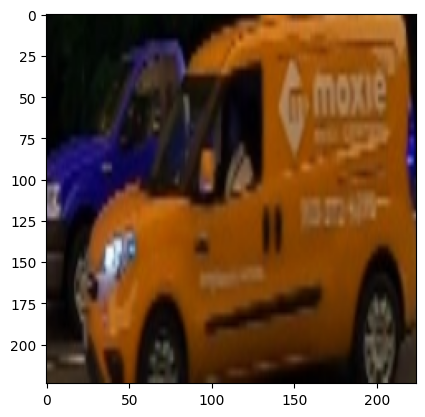

In [17]:
i=random.randint(1,10583)
print('Class:',data_label[i])
print('Görüntü boyutu:',data[i].shape)
plt.imshow(data[i]);

Más información sobre la data


In [18]:
data=np.asarray(data)
data_label=np.asarray(data_label)

In [19]:
print('Araba görüntüsü yok:',len(data_label[data_label==0]),'|Araba görüntüsü var:',len(data_label[data_label==1]))

Araba görüntüsü yok: 5291 |Araba görüntüsü var: 5290


In [20]:
data.shape

(10581, 224, 224, 3)

In [21]:
data_label.shape

(10581,)

# <font color="#000080B">**5. Modeling**</font>

---

Divición de la data para el entrenamiento y la validación


In [22]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(data,data_label,test_size=0.33, random_state=42)

In [23]:
print('x_train shape:',x_train.shape)
print('x_val shape:',x_val.shape)
print('y_train shape:',y_train.shape)
print('y_val shape:',y_val.shape)

x_train shape: (7089, 224, 224, 3)
x_val shape: (3492, 224, 224, 3)
y_train shape: (7089,)
y_val shape: (3492,)


Modelo


In [24]:
base_model=tf.keras.applications.VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [25]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
model=tf.keras.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_________________________________________________________________


In [28]:
base_model.trainable=False

In [29]:
for i,layer in enumerate(base_model.layers):
  print(i,layer.name,'-',layer.trainable)

0 input_1 - False
1 block1_conv1 - False
2 block1_conv2 - False
3 block1_pool - False
4 block2_conv1 - False
5 block2_conv2 - False
6 block2_pool - False
7 block3_conv1 - False
8 block3_conv2 - False
9 block3_conv3 - False
10 block3_pool - False
11 block4_conv1 - False
12 block4_conv2 - False
13 block4_conv3 - False
14 block4_pool - False
15 block5_conv1 - False
16 block5_conv2 - False
17 block5_conv3 - False
18 block5_pool - False


In [30]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

## <font color="#000080B">**5.3. Training and validation**</font>

In [31]:
epoch=4
hist=model.fit(x_train,y_train,epochs=epoch,validation_data=(x_val,y_val))

Epoch 1/4
222/222 [==============================] - 7055s 32s/step - loss: 0.6882 - accuracy: 0.8134 - val_loss: 0.2011 - val_accuracy: 0.9576
Epoch 2/4
222/222 [==============================] - 7042s 32s/step - loss: 0.2574 - accuracy: 0.9290 - val_loss: 0.1547 - val_accuracy: 0.9696
Epoch 3/4
222/222 [==============================] - 6989s 32s/step - loss: 0.1970 - accuracy: 0.9451 - val_loss: 0.1432 - val_accuracy: 0.9716
Epoch 4/4
222/222 [==============================] - 7004s 32s/step - loss: 0.1805 - accuracy: 0.9481 - val_loss: 0.1238 - val_accuracy: 0.9705


# <font color="#000080B">**6. Prediction**</font>

---


Fotoğraftaki muhtemel obje sayısı:  2037
1/1 [==============================] - 1s 570ms/step
kaç adet class tahmini 1 olan muhtemel bounty box var: 36
-------------------------------------------------------------------------


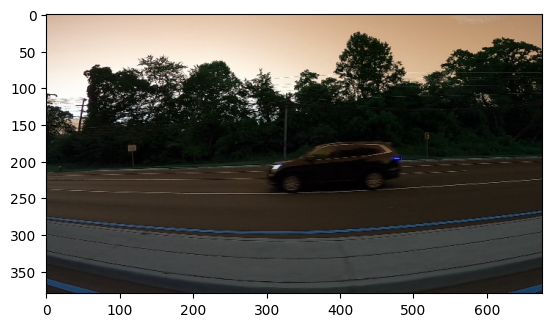

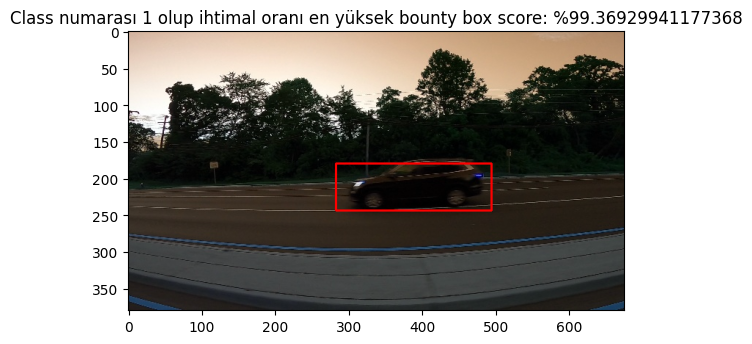

In [33]:
car=[]
photo_path='/content/drive/MyDrive/Datasets/testing_images/vid_5_27620.jpg'
deneme_img=cv2.imread(photo_path)
ss.setBaseImage(deneme_img)
ss.switchToSelectiveSearchFast()
rects1 = ss.process()
print('Fotoğraftaki muhtemel obje sayısı: ',len(rects1))
for i in rects1:
  x, y, w, h = i
  bb3={'x1':x,
        'y1':y,
        'x2':x+w,
        'y2':y+h
      }
  try:
    assert bb3['x1'] < bb3['x2']
    assert bb3['y1'] < bb3['y2']
    img_data=deneme_img[bb3['y1']:bb3['y2'],bb3['x1']:bb3['x2']]
    img_data=cv2.resize(img_data,(224,224))
    tahmin=model.predict(img_data.reshape(1,224,224,3))
    if tahmin[0]>0.5:
      car.append([bb3,tahmin[0]])
    else:
      pass
  except Exception as e:
    print('hata',e)
print('kaç adet class tahmini 1 olan muhtemel bounty box var:',len(car))
print('-------------------------------------------------------------------------')
deneme_img=cv2.imread(photo_path)
car[np.argmax(np.array(car)[:,1])][0]
pt1=(car[np.argmax(np.array(car)[:,1])][0]['x1'],car[np.argmax(np.array(car)[:,1])][0]['y1'])
pt2=(car[np.argmax(np.array(car)[:,1])][0]['x2'],car[np.argmax(np.array(car)[:,1])][0]['y2'])
plt.figure()
plt.imshow(deneme_img)
cv2.rectangle(deneme_img,pt1,pt2,(255, 0, 0),2)
plt.figure()
plt.title(f'Class numarası 1 olup ihtimal oranı en yüksek bounty box score: %{car[np.argmax(np.array(car)[:,1])][1][0]*100}')
plt.imshow(deneme_img);